# Prediction of store sales

In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Assuming the file is in a folder named 'data' inside 'My Drive'
file_path = '/content/drive/My Drive/data/merged_store.csv'

# Load the file into a DataFrame

df = pd.read_csv(file_path)
df

<ipython-input-3-4c3d168a724c>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,2007,1,13,2010,"Jan,Apr,Jul,Oct",0,1,4,7,10
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,1,4,7,10
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,2009,0,0,0,"0,0,0,0",0,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,2015,0,0,0,"0,0,0,0",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,2014,1,31,2013,"Jan,Apr,Jul,Oct",0,1,4,7,10
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,2006,0,0,0,"0,0,0,0",0,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,1900,0,0,0,"0,0,0,0",1,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,1900,0,0,0,"0,0,0,0",1,0,0,0,0


In [4]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,DayOfMonth,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,...,5.244756e+00,1.974140e+03,5.005638e-01,1.164767e+01,1.007011e+03,3.178776e-01,8.087758e-01,2.310467e+00,3.812159e+00,5.313850e+00
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,...,3.928522e+00,5.085323e+01,4.999999e-01,1.532393e+01,1.005877e+03,4.656519e-01,9.811752e-01,2.374089e+00,3.848362e+00,5.336992e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,...,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,...,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,...,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,...,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,1.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,...,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 28 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Store                         1017209 non-null  int64  
 1   DayOfWeek                     1017209 non-null  int64  
 2   Date                          1017209 non-null  object 
 3   Sales                         1017209 non-null  int64  
 4   Customers                     1017209 non-null  int64  
 5   Open                          1017209 non-null  int64  
 6   Promo                         1017209 non-null  int64  
 7   StateHoliday                  1017209 non-null  object 
 8   SchoolHoliday                 1017209 non-null  int64  
 9   Year                          1017209 non-null  int64  
 10  Month                         1017209 non-null  int64  
 11  DayOfMonth                    1017209 non-null  int64  
 12  WeekOfYear                  

# Preprocessing

In [6]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'WeekOfYear', 'weekday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionBeforeStoreOpened',
       'PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3'],
      dtype='object')

In [7]:
df = df.drop(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
              'WeekOfYear', 'weekday', 'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
              'Promo2SinceYear', 'PromoInterval', 'CompetitionBeforeStoreOpened','PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3'], axis=1)

In [8]:
df = df.set_index('Date')

In [9]:
df.index

Index(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
       '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
       ...
       '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
       '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01'],
      dtype='object', name='Date', length=1017209)

In [10]:
df.index = pd.to_datetime(df.index, dayfirst=True)

<ipython-input-10-fb101a528202>:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df.index = pd.to_datetime(df.index, dayfirst=True)


<Axes: title={'center': 'sales'}, xlabel='Date'>

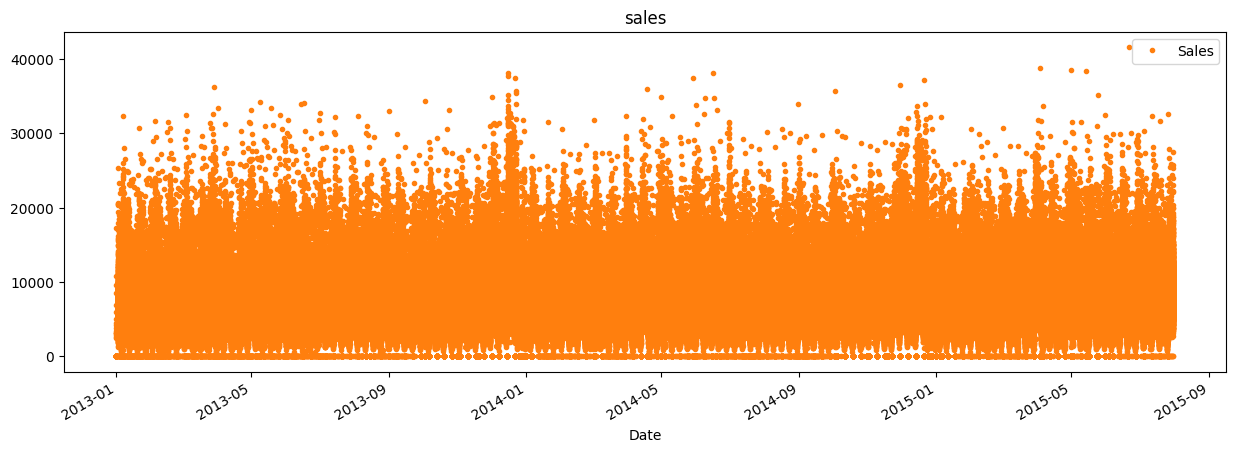

In [11]:
color_pallete = sns.color_palette()
df.plot(style='.', figsize=(15,5), color= color_pallete[1], title="sales")

# Train/Test splitting

In [12]:
train = df.loc[df.index< '2014-09-30']
test = df.loc[df.index >= '2014-09-30']

In [13]:
len(train), len(test)

(693874, 323335)

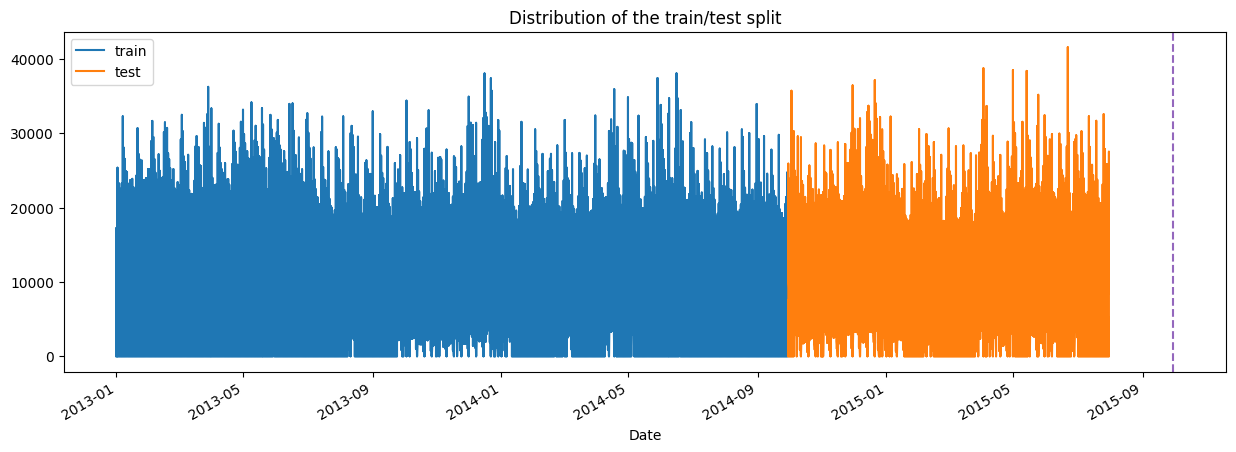

In [14]:
fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax = ax, label = "Training", title = "Distribution of the train/test split")
test.plot(ax = ax, label = "Testing")
ax.axvline('2015-09-30', color = color_pallete[4], ls = '--')
ax.legend(['train','test'])
plt.show()

# Feature Extraction

In [15]:
def feature_extraction(df):
    df = df.copy()

    # Ensure the index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
        df.set_index('Date', inplace=True)

     # features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.day_of_year

    df['weekdays'] = np.where(df['dayofweek'] < 5, 1, 0)  # 1 for weekdays, 0 for weekends
    df['weekends'] = np.where(df['dayofweek'] >= 5, 1, 0)  # 1 for weekends, 0 for weekdays

    # Assume holidays are defined in a list
    holidays = pd.to_datetime(['2024-01-01', '2024-12-25'])  # Example holiday dates

    # Calculate days to holidays
    df['days_to_holiday'] = np.min([(holiday - df.index).days for holiday in holidays], axis=0)
    df['days_to_holiday'] = df['days_to_holiday'].clip(lower=0)  # Clip negative values to 0

    # Calculate days after holidays
    df['days_after_holiday'] = np.max([(df.index - holiday).days for holiday in holidays], axis=0)
    df['days_after_holiday'] = df['days_after_holiday'].clip(lower=0)  # Clip negative values to 0

    # Beginning, mid, and end of the month
    df['beginning_of_month'] = (df.index.day <= 10).astype(int)  # 1 for beginning of month
    df['mid_month'] = ((df.index.day > 10) & (df.index.day <= 20)).astype(int)  # 1 for mid month
    df['end_of_month'] = (df.index.day > 20).astype(int)  # 1 for end of month

    return df

# Example usage
df = feature_extraction(df)

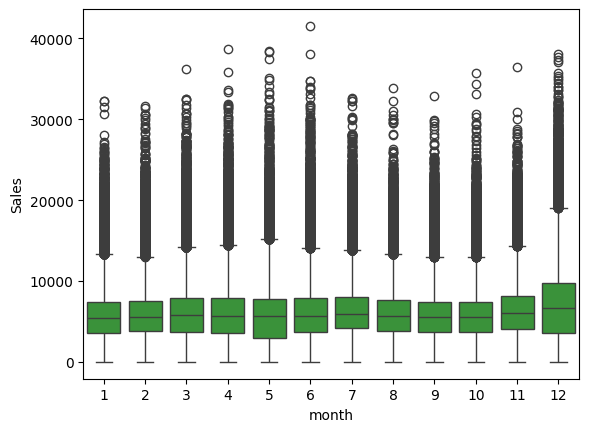

In [16]:
sns.boxplot(data=df, x='month', y = 'Sales', color=color_pallete[2])
ax.set_title('Month')
plt.show()

In [17]:
train = feature_extraction(train)
test = feature_extraction(test)

In [18]:
test.drop(['hour','dayofyear'], axis = 1)
train.drop(['hour','dayofyear'], axis= 1)

,Sales,dayofweek,quarter,month,weekdays,weekends,days_to_holiday,days_after_holiday,beginning_of_month,mid_month,end_of_month
Date,,,,,,,,,,,
2014-09-29,5280,0,3,9,1,0,3381,0,0,0,1
2014-09-29,7514,0,3,9,1,0,3381,0,0,0,1
2014-09-29,10066,0,3,9,1,0,3381,0,0,0,1
2014-09-29,10201,0,3,9,1,0,3381,0,0,0,1
2014-09-29,6274,0,3,9,1,0,3381,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,0,1,1,1,1,0,4017,0,1,0,0
2013-01-01,0,1,1,1,1,0,4017,0,1,0,0
2013-01-01,0,1,1,1,1,0,4017,0,1,0,0


In [19]:
df.columns

Index(['Sales', 'hour', 'dayofweek', 'quarter', 'month', 'dayofyear',
       'weekdays', 'weekends', 'days_to_holiday', 'days_after_holiday',
       'beginning_of_month', 'mid_month', 'end_of_month'],
      dtype='object')

In [20]:
Features  = ['hour', 'dayofweek', 'quarter', 'month', 'dayofyear','weekdays', 'weekends',
             'days_to_holiday', 'days_after_holiday','beginning_of_month', 'mid_month', 'end_of_month']
Target = 'Sales'

In [21]:
X_train = train[Features]
Y_train = train[Target]
X_test = test[Features]
Y_test = test[Target]

In [22]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((693874, 12), (693874,), (323335, 12), (323335,))

# Use Different Regressor Models

## xgboost

In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

# Create an instance of XGBRegressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.01, random_state=42)

# Fit the model to the training data
xgb.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=True)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)
mse_xgb = mean_squared_error(Y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(Y_test, y_pred_xgb)
r2_xgb = r2_score(Y_test, y_pred_xgb)

# Print evaluation metrics
print("XGBoost Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R²): {r2_xgb}")

[0]	validation_0-rmse:3962.16374
[1]	validation_0-rmse:3949.57500
[2]	validation_0-rmse:3937.27872
[3]	validation_0-rmse:3925.38306
[4]	validation_0-rmse:3913.65364
[5]	validation_0-rmse:3902.31410
[6]	validation_0-rmse:3891.19258
[7]	validation_0-rmse:3880.38809
[8]	validation_0-rmse:3869.79691
[9]	validation_0-rmse:3859.51168
[10]	validation_0-rmse:3849.43313
[11]	validation_0-rmse:3839.65711
[12]	validation_0-rmse:3830.17517
[13]	validation_0-rmse:3820.79022
[14]	validation_0-rmse:3811.66540
[15]	validation_0-rmse:3799.31717
[16]	validation_0-rmse:3790.61301
[17]	validation_0-rmse:3778.64789
[18]	validation_0-rmse:3770.28552
[19]	validation_0-rmse:3758.59812
[20]	validation_0-rmse:3750.64654
[21]	validation_0-rmse:3742.90420
[22]	validation_0-rmse:3735.34924
[23]	validation_0-rmse:3728.02190
[24]	validation_0-rmse:3720.91688
[25]	validation_0-rmse:3710.25768
[26]	validation_0-rmse:3699.86709
[27]	validation_0-rmse:3689.55498
[28]	validation_0-rmse:3679.43099
[29]	validation_0-rmse:3

In [52]:
importance = xgb.feature_importances_

# Create a dataframe for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the results
print(importance_df)

               Feature  Importance
1            dayofweek    0.748932
4            dayofyear    0.055369
10           mid_month    0.043518
9   beginning_of_month    0.036653
11        end_of_month    0.031032
7      days_to_holiday    0.029545
2              quarter    0.029378
3                month    0.025573
0                 hour    0.000000
5             weekdays    0.000000
6             weekends    0.000000
8   days_after_holiday    0.000000


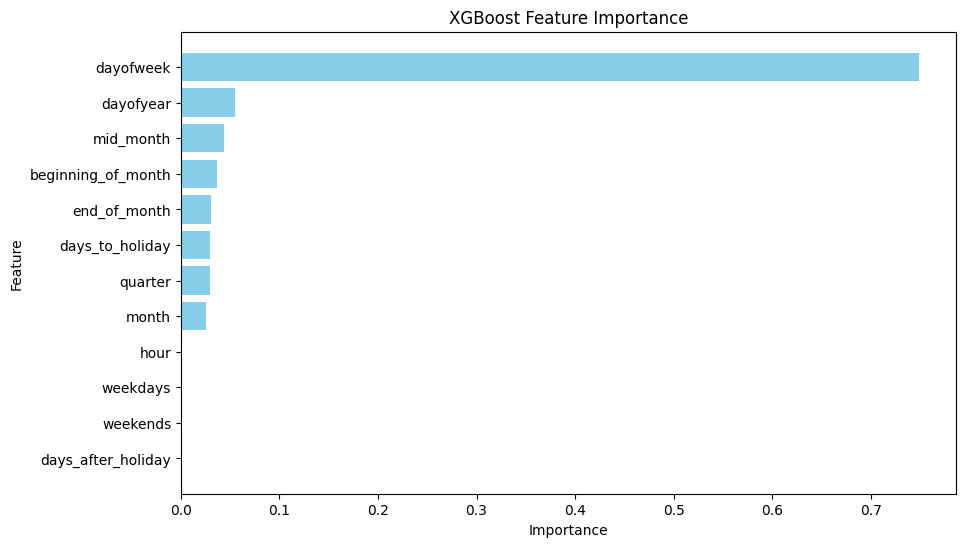

In [37]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## Linear Regression

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Scale your features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of LinearRegression
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train_scaled, Y_train)

# Predict on the test set
y_pred_lr = lin_reg.predict(X_test_scaled)

# Evaluate the model
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)

# Print evaluation metrics
print("Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R-squared (R²): {r2_lr}")

Linear Regression Evaluation:
Mean Absolute Error (MAE): 2606.9044733885307
Mean Squared Error (MSE): 11870430.787660664
Root Mean Squared Error (RMSE): 3445.3491532297076
R-squared (R²): 0.24377068284949432


In [54]:
# Get the feature importance (coefficients)
feature_importance = np.abs(lin_reg.coef_)

# Create a dataframe for easy visualization
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the results
print(importance_df)

               Feature    Importance
6             weekends  5.596000e+15
5             weekdays  5.596000e+15
11        end_of_month  7.585896e+14
10           mid_month  7.524471e+14
9   beginning_of_month  7.524463e+14
8   days_after_holiday  4.016481e+12
4            dayofyear  4.087776e+03
3                month  3.599955e+03
1            dayofweek  1.017268e+03
2              quarter  3.332121e+02
7      days_to_holiday  6.468612e+01
0                 hour  0.000000e+00


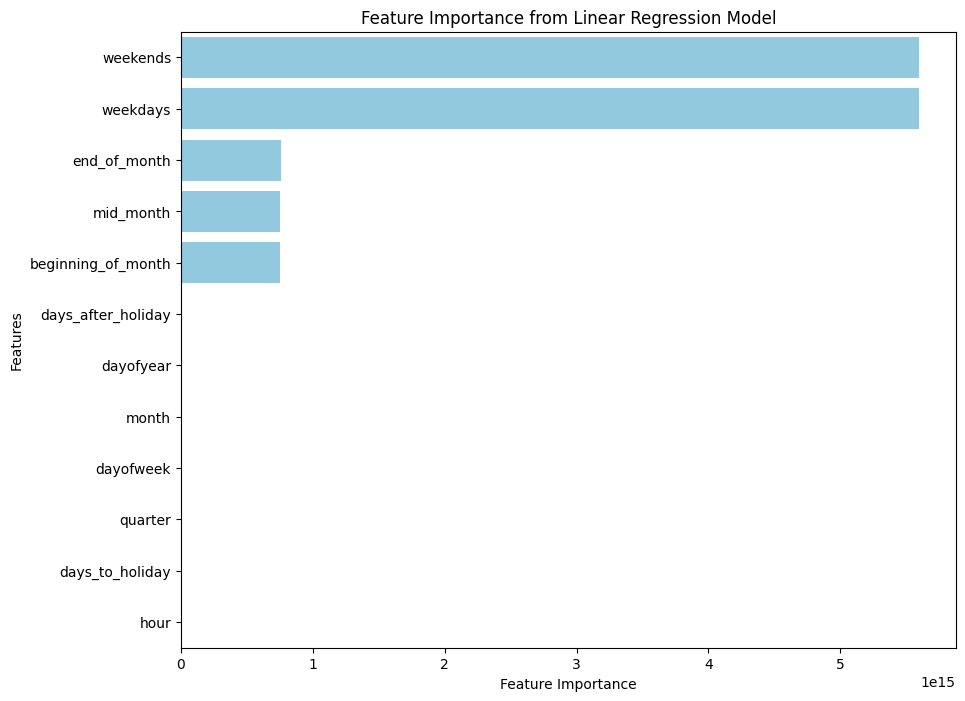

In [55]:
# Plot the feature importance with a single color
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Linear Regression Model')

# Display the plot
plt.show()

## Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Create an instance of RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, Y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
mse_rf = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R²): {r2_rf}")

Random Forest Regression Evaluation:
Mean Absolute Error (MAE): 2495.839064232209
Mean Squared Error (MSE): 13991870.077363292
Root Mean Squared Error (RMSE): 3740.5708223964016
R-squared (R²): 0.10862018880881141


In [58]:
# Get feature importance
feature_importance = rf.feature_importances_

# Create a dataframe for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the results
print(importance_df)

               Feature  Importance
1            dayofweek    0.670161
4            dayofyear    0.169502
7      days_to_holiday    0.112448
3                month    0.012603
11        end_of_month    0.010227
10           mid_month    0.008116
9   beginning_of_month    0.007725
5             weekdays    0.003622
6             weekends    0.002862
2              quarter    0.002735
0                 hour    0.000000
8   days_after_holiday    0.000000


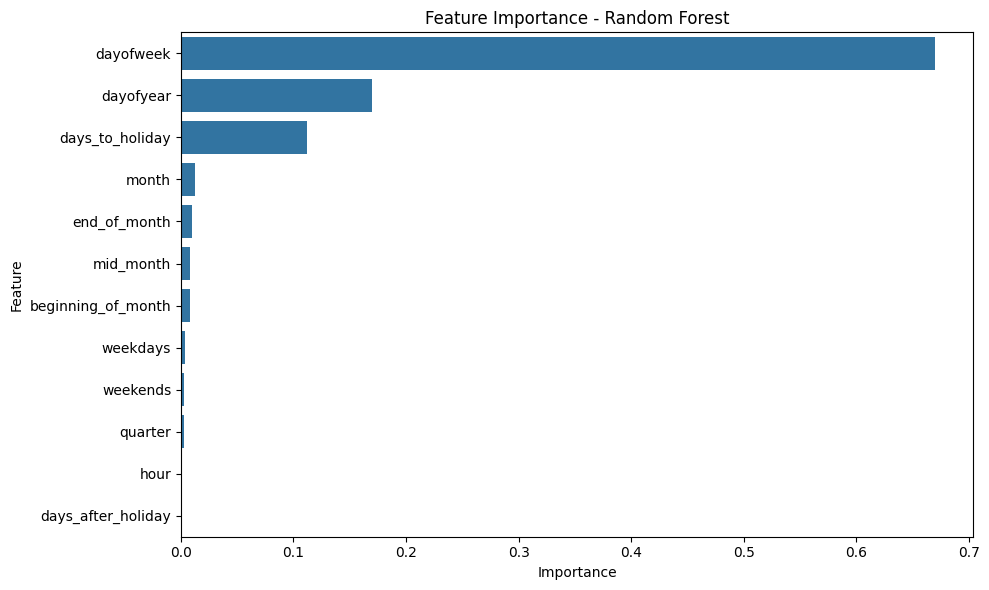

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting feature importance using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create an instance of DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt.fit(X_train, Y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(Y_test, y_pred_dt)
mse_dt = mean_squared_error(Y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)

# Print evaluation metrics
print("Decision Tree Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R-squared (R²): {r2_dt}")

Decision Tree Regression Evaluation:
Mean Absolute Error (MAE): 2644.955063522245
Mean Squared Error (MSE): 16030428.578133734
Root Mean Squared Error (RMSE): 4003.8017655890176
R-squared (R²): -0.021250220326761493


## Gradient Boosting Regressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create an instance of GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Fit the model to the training data
gb.fit(X_train, Y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(Y_test, y_pred_gb)
mse_gb = mean_squared_error(Y_test, y_pred_gb)
rmse_gb = root_mean_squared_error(Y_test, y_pred_gb)
r2_gb = r2_score(Y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"R-squared (R²): {r2_gb}")

Gradient Boosting Regression Evaluation:
Mean Absolute Error (MAE): 2132.924051067149
Mean Squared Error (MSE): 9720052.884562436
Root Mean Squared Error (RMSE): 3117.699934978098
R-squared (R²): 0.38076476860465713


In [62]:
# Get feature importance
feature_importance = gb.feature_importances_

# Create a dataframe for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

               Feature    Importance
1            dayofweek  8.591818e-01
4            dayofyear  8.281041e-02
7      days_to_holiday  3.011425e-02
5             weekdays  9.767850e-03
6             weekends  9.375477e-03
9   beginning_of_month  3.338480e-03
11        end_of_month  3.096934e-03
3                month  1.968765e-03
10           mid_month  3.458453e-04
2              quarter  2.042660e-07
0                 hour  0.000000e+00
8   days_after_holiday  0.000000e+00


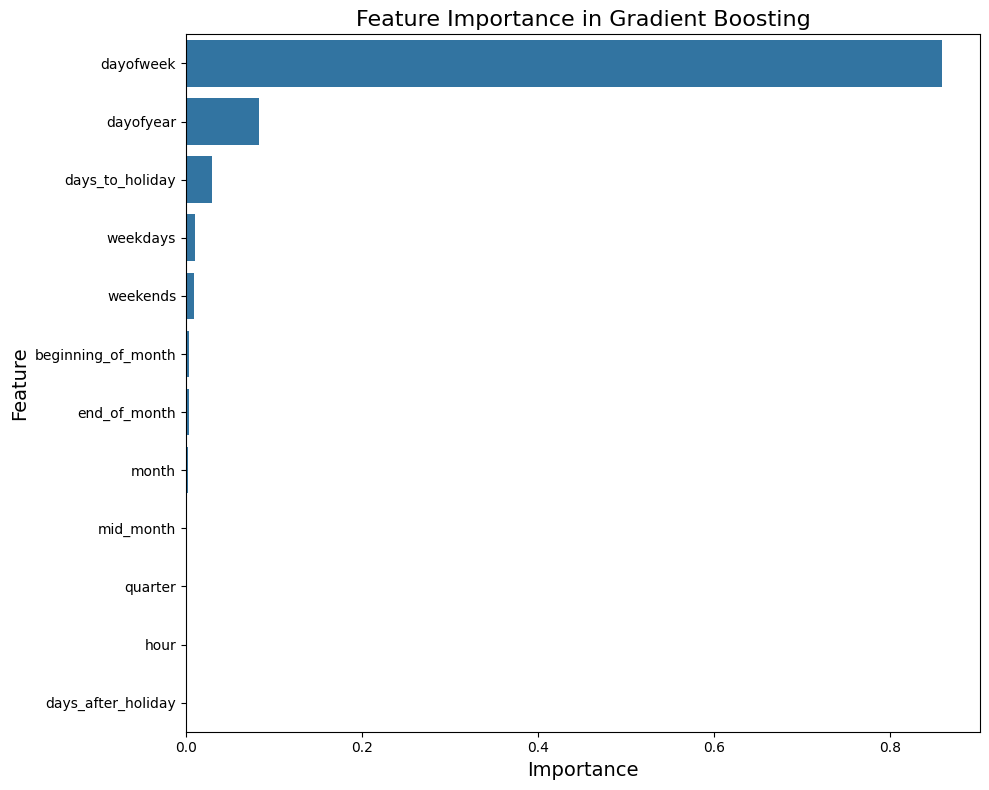

In [63]:
# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Add titles and labels
plt.title('Feature Importance in Gradient Boosting', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

## ANN model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
model.add(Dense(48, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(X_train_scaled, Y_train, epochs=150, batch_size=64, verbose=1)

# Predict on the test set
y_pred_ann = model.predict(X_test_scaled)

# Evaluate the model
mae_ann = mean_absolute_error(Y_test, y_pred_ann)
mse_ann = mean_squared_error(Y_test, y_pred_ann)
rmse_ann = mean_squared_error(Y_test, y_pred_ann, squared=False)  # RMSE
r2_ann = r2_score(Y_test, y_pred_ann)

# Print evaluation metrics
print("Artificial Neural Network Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ann}")
print(f"Mean Squared Error (MSE): {mse_ann}")
print(f"Root Mean Squared Error (RMSE): {rmse_ann}")
print(f"R-squared (R²): {r2_ann}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 16863206.0000
Epoch 2/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 10085813.0000
Epoch 3/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 8782223.0000
Epoch 4/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 8696172.0000
Epoch 5/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8591472.0000
Epoch 6/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 8496737.0000
Epoch 7/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8480289.0000
Epoch 8/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 8435898.0000
Epoch 9/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8369921.5000
Epoch 10/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8317732.0000
Epoch 11/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 8285704.0000
Epoch 12/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 8186417.0000
Epoch 13/150
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## LSTM

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale your features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Here, we'll use 1 time step (we can adjust this based on your needs)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create an LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=64, verbose=1)

# Predict on the test set
y_pred_lstm = model.predict(X_test_reshaped)

# Evaluate the model
mae_lstm = mean_absolute_error(Y_test, y_pred_lstm)
mse_lstm = mean_squared_error(Y_test, y_pred_lstm)
rmse_lstm = mean_squared_error(Y_test, y_pred_lstm, squared=False)  # RMSE
r2_lstm = r2_score(Y_test, y_pred_lstm)

# Print evaluation metrics
print("LSTM Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"R-squared (R²): {r2_lstm}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 17373018.0000
Epoch 2/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 9177302.0000
Epoch 3/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 8699021.0000
Epoch 4/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 8494309.0000
Epoch 5/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 8396084.0000
Epoch 6/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 8339839.0000
Epoch 7/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 8182600.0000
Epoch 8/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8169984.5000
Epoch 9/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 8002097.5000
Epoch 10/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8001411.0000
Epoch 11/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 7957824.0000
Epoch 12/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 7927412.0000
Epoch 13/100
10842/10842 ━━━━━━━━━━━━━━━━━━━━ 21

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
